# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract header cells (<th>) and data cells (<td>)
    cells = row.find_all(['th', 'td'])
    # Create a list of cell texts with stripping whitespace
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
header = data[0]        # contains column names: id, terrestrial_date, sol, ls, month, min_temp, pressure
table_data = data[1:]     # remaining rows are the data
df = pd.DataFrame(table_data, columns=header)

In [8]:
# Confirm DataFrame was created successfully
print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print("\nData types before conversion:")
print(df.dtypes)


Data types before conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [11]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"\nNumber of unique Martian months: {num_months}")


Number of unique Martian months: 12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df.shape[0]
print(f"Number of Martian days (sols) in dataset: {num_sols}")

Number of Martian days (sols) in dataset: 1867


In [14]:
# 3. What is the average minimum temperature by month?
temp_by_month = df.groupby('month')['min_temp'].mean()
print("\nAverage minimum temperature by month:")
print(temp_by_month)


Average minimum temperature by month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


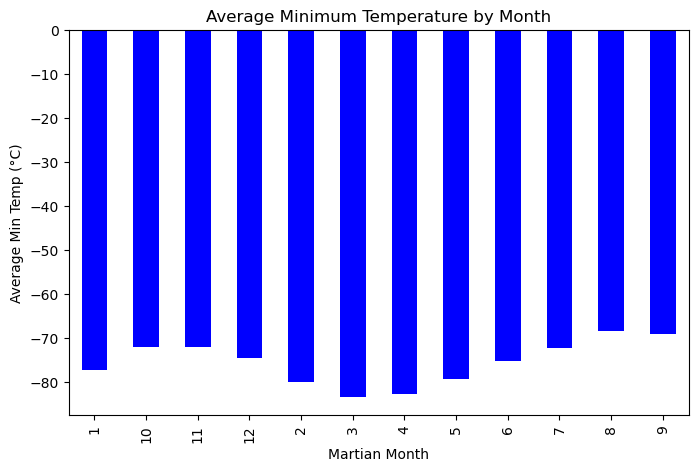

In [15]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 5))
temp_by_month.plot(kind='bar', color='blue', title='Average Minimum Temperature by Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Min Temp (°C)')
plt.show()

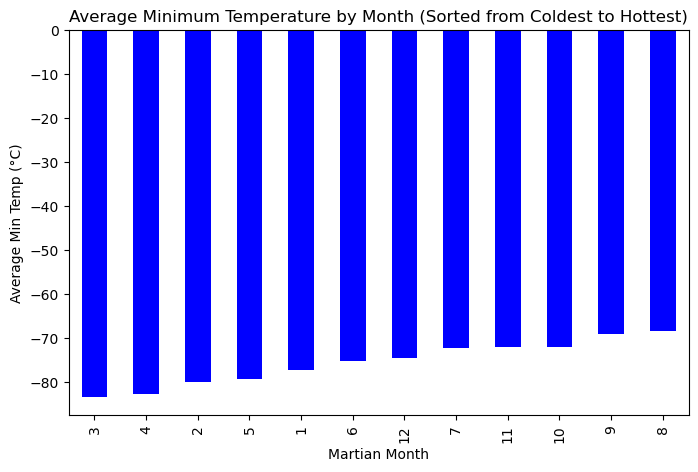

In [23]:
# Sort the average minimum temperature Series (from coldest to hottest)
sorted_temp_by_month = temp_by_month.sort_values()

# Plot the sorted data
plt.figure(figsize=(8, 5))
sorted_temp_by_month.plot(kind='bar', color='blue', 
                            title='Average Minimum Temperature by Month (Sorted from Coldest to Hottest)')
plt.xlabel('Martian Month')
plt.ylabel('Average Min Temp (°C)')
plt.show()


In [16]:
# 4. What is the average pressure by month?
pressure_by_month = df.groupby('month')['pressure'].mean()
print("\nAverage atmospheric pressure by month:")
print(pressure_by_month)


Average atmospheric pressure by month:
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


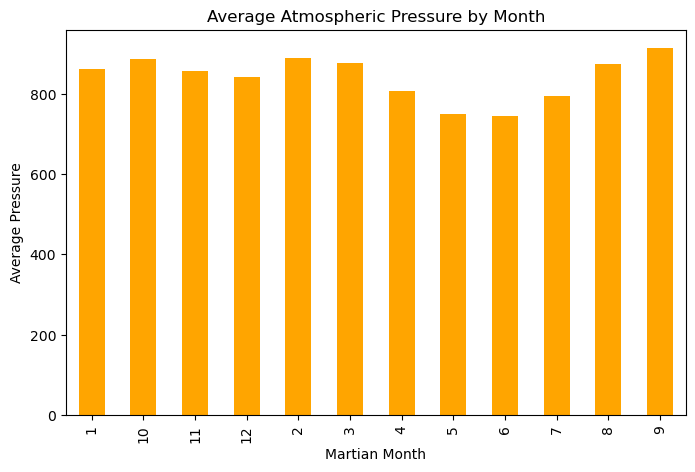

In [17]:
# Plot the average pressure by month
plt.figure(figsize=(8, 5))
pressure_by_month.plot(kind='bar', color='orange', title='Average Atmospheric Pressure by Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.show()

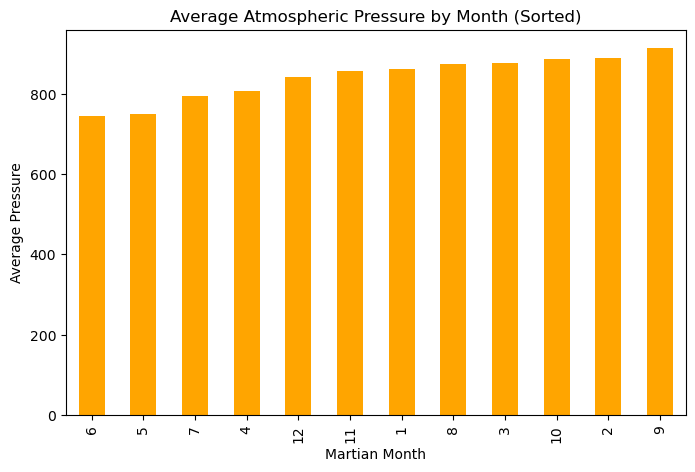

In [18]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_by_month = pressure_by_month.sort_values()

# Plot the sorted data
plt.figure(figsize=(8, 5))
sorted_pressure_by_month.plot(kind='bar', color='orange', title='Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.show()


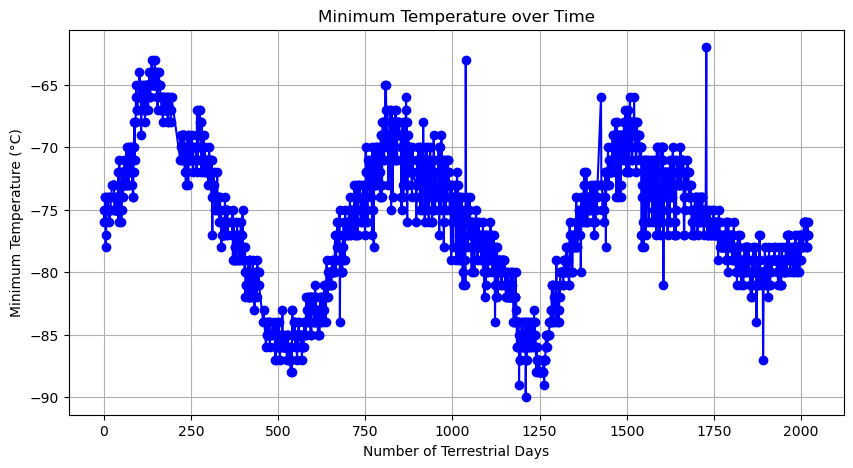

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Create a new column 'day_index' as the number of terrestrial days since the start date.
df['day_index'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Create the line chart.
plt.figure(figsize=(10, 5))
plt.plot(df['day_index'], df['min_temp'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Time')
plt.grid(True)  

# Display the plot.
plt.show()

In [ ]:
# Placed this all down here to avoid having to scroll up and down to see the results.
# What is the overall minimum temperature and average atmospheric pressure from the dataset?

# Calculate the overall minimum temperature from the dataset
min_temp_overall = df['min_temp'].min()
print("Minimum Temperature: {} °C".format(min_temp_overall))

# Calculate the overall average atmospheric pressure from the dataset
avg_pressure_overall = df['pressure'].mean()
print("Average Atmospheric Pressure: {:.2f} Pa".format(avg_pressure_overall))

# Alternatively, if the assignment requires the lowest recorded atmospheric pressure in the dataset:
min_pressure = df['pressure'].min()
print("Minimum Atmospheric Pressure: {} Pa".format(min_pressure))

# Calculate the length of the dataset in terrestrial days.
# This gives an estimate of the number of Earth days covered by the dataset.
year_length = (df['terrestrial_date'].max() - df['terrestrial_date'].min()).days + 1
print("Length of the Martian year (in terrestrial days): {} days".format(year_length))


Minimum Temperature: -90.0 °C
Average Atmospheric Pressure: 841.07 Pa
Minimum Atmospheric Pressure: 727.0 Pa
Length of the Martian year (in terrestrial days): 2022 days


#### Minimum Temperature

-90.0 °C

#### Atmospheric Pressure

Average Atmospheric Pressure: 841.07 Pa
Minimum Atmospheric Pressure: 727.0 Pa

#### Year Length

Length of the Martian year (in terrestrial days): 2022 days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)
print("\nDataFrame exported to mars_weather.csv")


DataFrame exported to mars_weather.csv


In [22]:
browser.quit()